# Is this called DS?

In this notebook I'll try to make some Data Analysis. All datasets are property of bgp204.

EDA --> cleaning, correlation analysis, multivariate index analysis

ML --> KNN - guess the index game

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [300]:
df = pd.read_csv(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\ГИПЕРСУПЕРТАБЛИЧКА - Лист1.csv", encoding='utf-8')
df = df.fillna(0)
df = df.rename({'P buildings_index': 'P_buildings_index'}, axis=1)
print(df.shape)
df.head()

(73, 19)


№  LN_type_1  S natural (%)  S artificial (%)  S buildings (%)  \
0  1          1             33                47               20   
1  2          2              0               100                0   
2  3          1              0                 0              100   
3  4          1             51                37               12   
4  5          1              1                 0               99   

   P buildings (sqm/ha)  P_buildings_index  floors_cnt  S commercial_FN (%)  \
0              2.616220                  3          12                    4   
1              0.000000                  0           0                    0   
2              0.535549                  1           1                  100   
3              2.750571                  3          24                    4   
4              1.377201                  3           1                    0   

   S resid_FN (%)  S industry_FN (%)  S resid (sqm)  S non-resid (sqm)  \
0              96                  0       12729.24             534.76   
1               0                100           0.00            1500.00   
2               0                  0           0.00            2072.20   
3              96                  0       12170.17             502.83   
4               0                100           0.00             771.25   

   S (sqm)  Ландшафтное (вид)  Строительное (вид)  Высота (вид)  \
0  7582.39               1023              301026           301   
1  1904.20               2011                   0             0   
2  1934.65               1011              101005           101   
3  6729.86               1023              302028           302   
4   280.01               1011              100014           100   

   Функциональное (вид)  Высота_1  
0                  2002         3  
1                  3004         0  
2                  1004         1  
3                  2002         3  
4                  3004         1

In [283]:
columns_names = {}
for i in range(len(df.columns)):
    columns_names[i] = df.columns[i]
df.columns

Index(['№', 'LN_type_1', 'S natural (%)', 'S artificial (%)',
       'S buildings (%)', 'P buildings (sqm/ha)', 'P_buildings_index',
       'floors_cnt', 'S commercial_FN (%)', 'S resid_FN (%)',
       'S industry_FN (%)', 'S resid (sqm)', 'S non-resid (sqm)', 'S (sqm)',
       'Ландшафтное (вид)', 'Строительное (вид)', 'Высота (вид)',
       'Функциональное (вид)', 'Высота_1'],
      dtype='object')

### Ландшафтное назанчение

# объединить

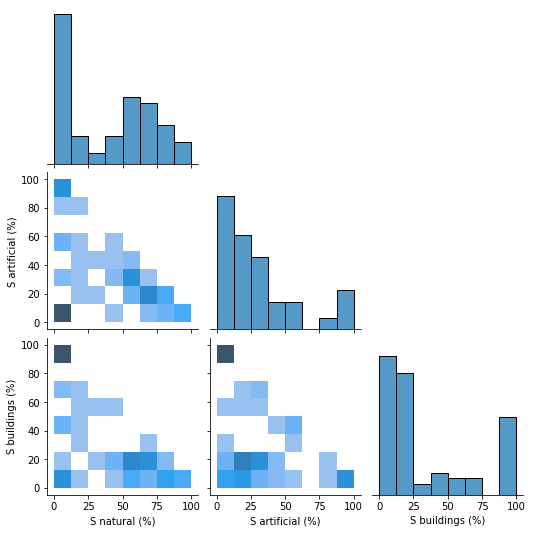

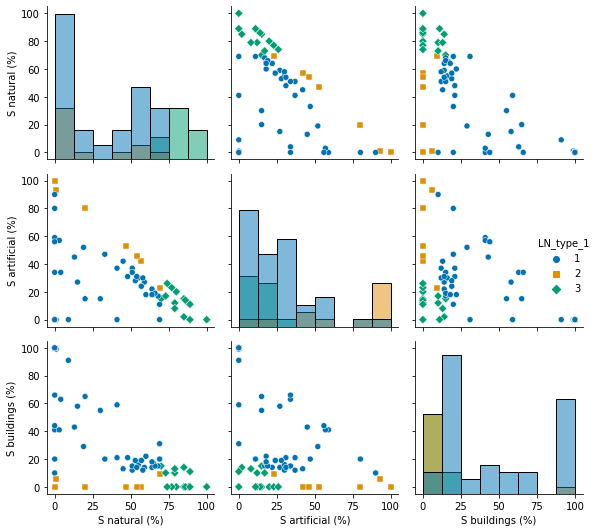

In [394]:
g = sns.pairplot(df[df.columns[[2,3,4]]], kind="hist", corner=True)
g = sns.pairplot(df[df.columns[[1,2,3,4]]], hue="LN_type_1", diag_kind='hist', markers=["o","s","D"], palette='colorblind')
plt.tight_layout()

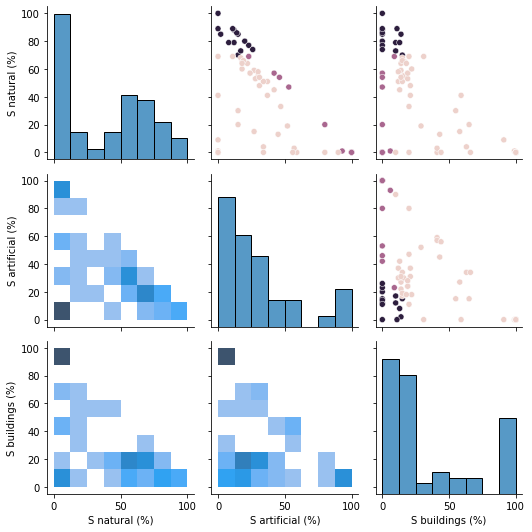

In [437]:
# cmap = sns.palplot(sns.light_palette("seagreen", reverse=True))

g = sns.PairGrid(df[df.columns[[2,3,4]]])
g.map_upper(sns.scatterplot, hue=df[df.columns[1]])
g.map_lower(sns.histplot)
g.map_diag(sns.histplot)
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\LN")

### Строительное назначение

In [307]:
buildings_df = df[df.columns[[13,6]]]
a = buildings_df.groupby(buildings_df.columns[1]).sum()
s_sum = df['S (sqm)'].sum()
k = np.array(a / s_sum)

buildings_df = df.loc[df['P_buildings_index'] == 3][df.columns[[13,-1]]]
a = buildings_df.groupby(buildings_df.columns[1]).sum()
s_sum = df.loc[df['P_buildings_index'] == 3]['S (sqm)'].sum()
p = np.array(a / s_sum)

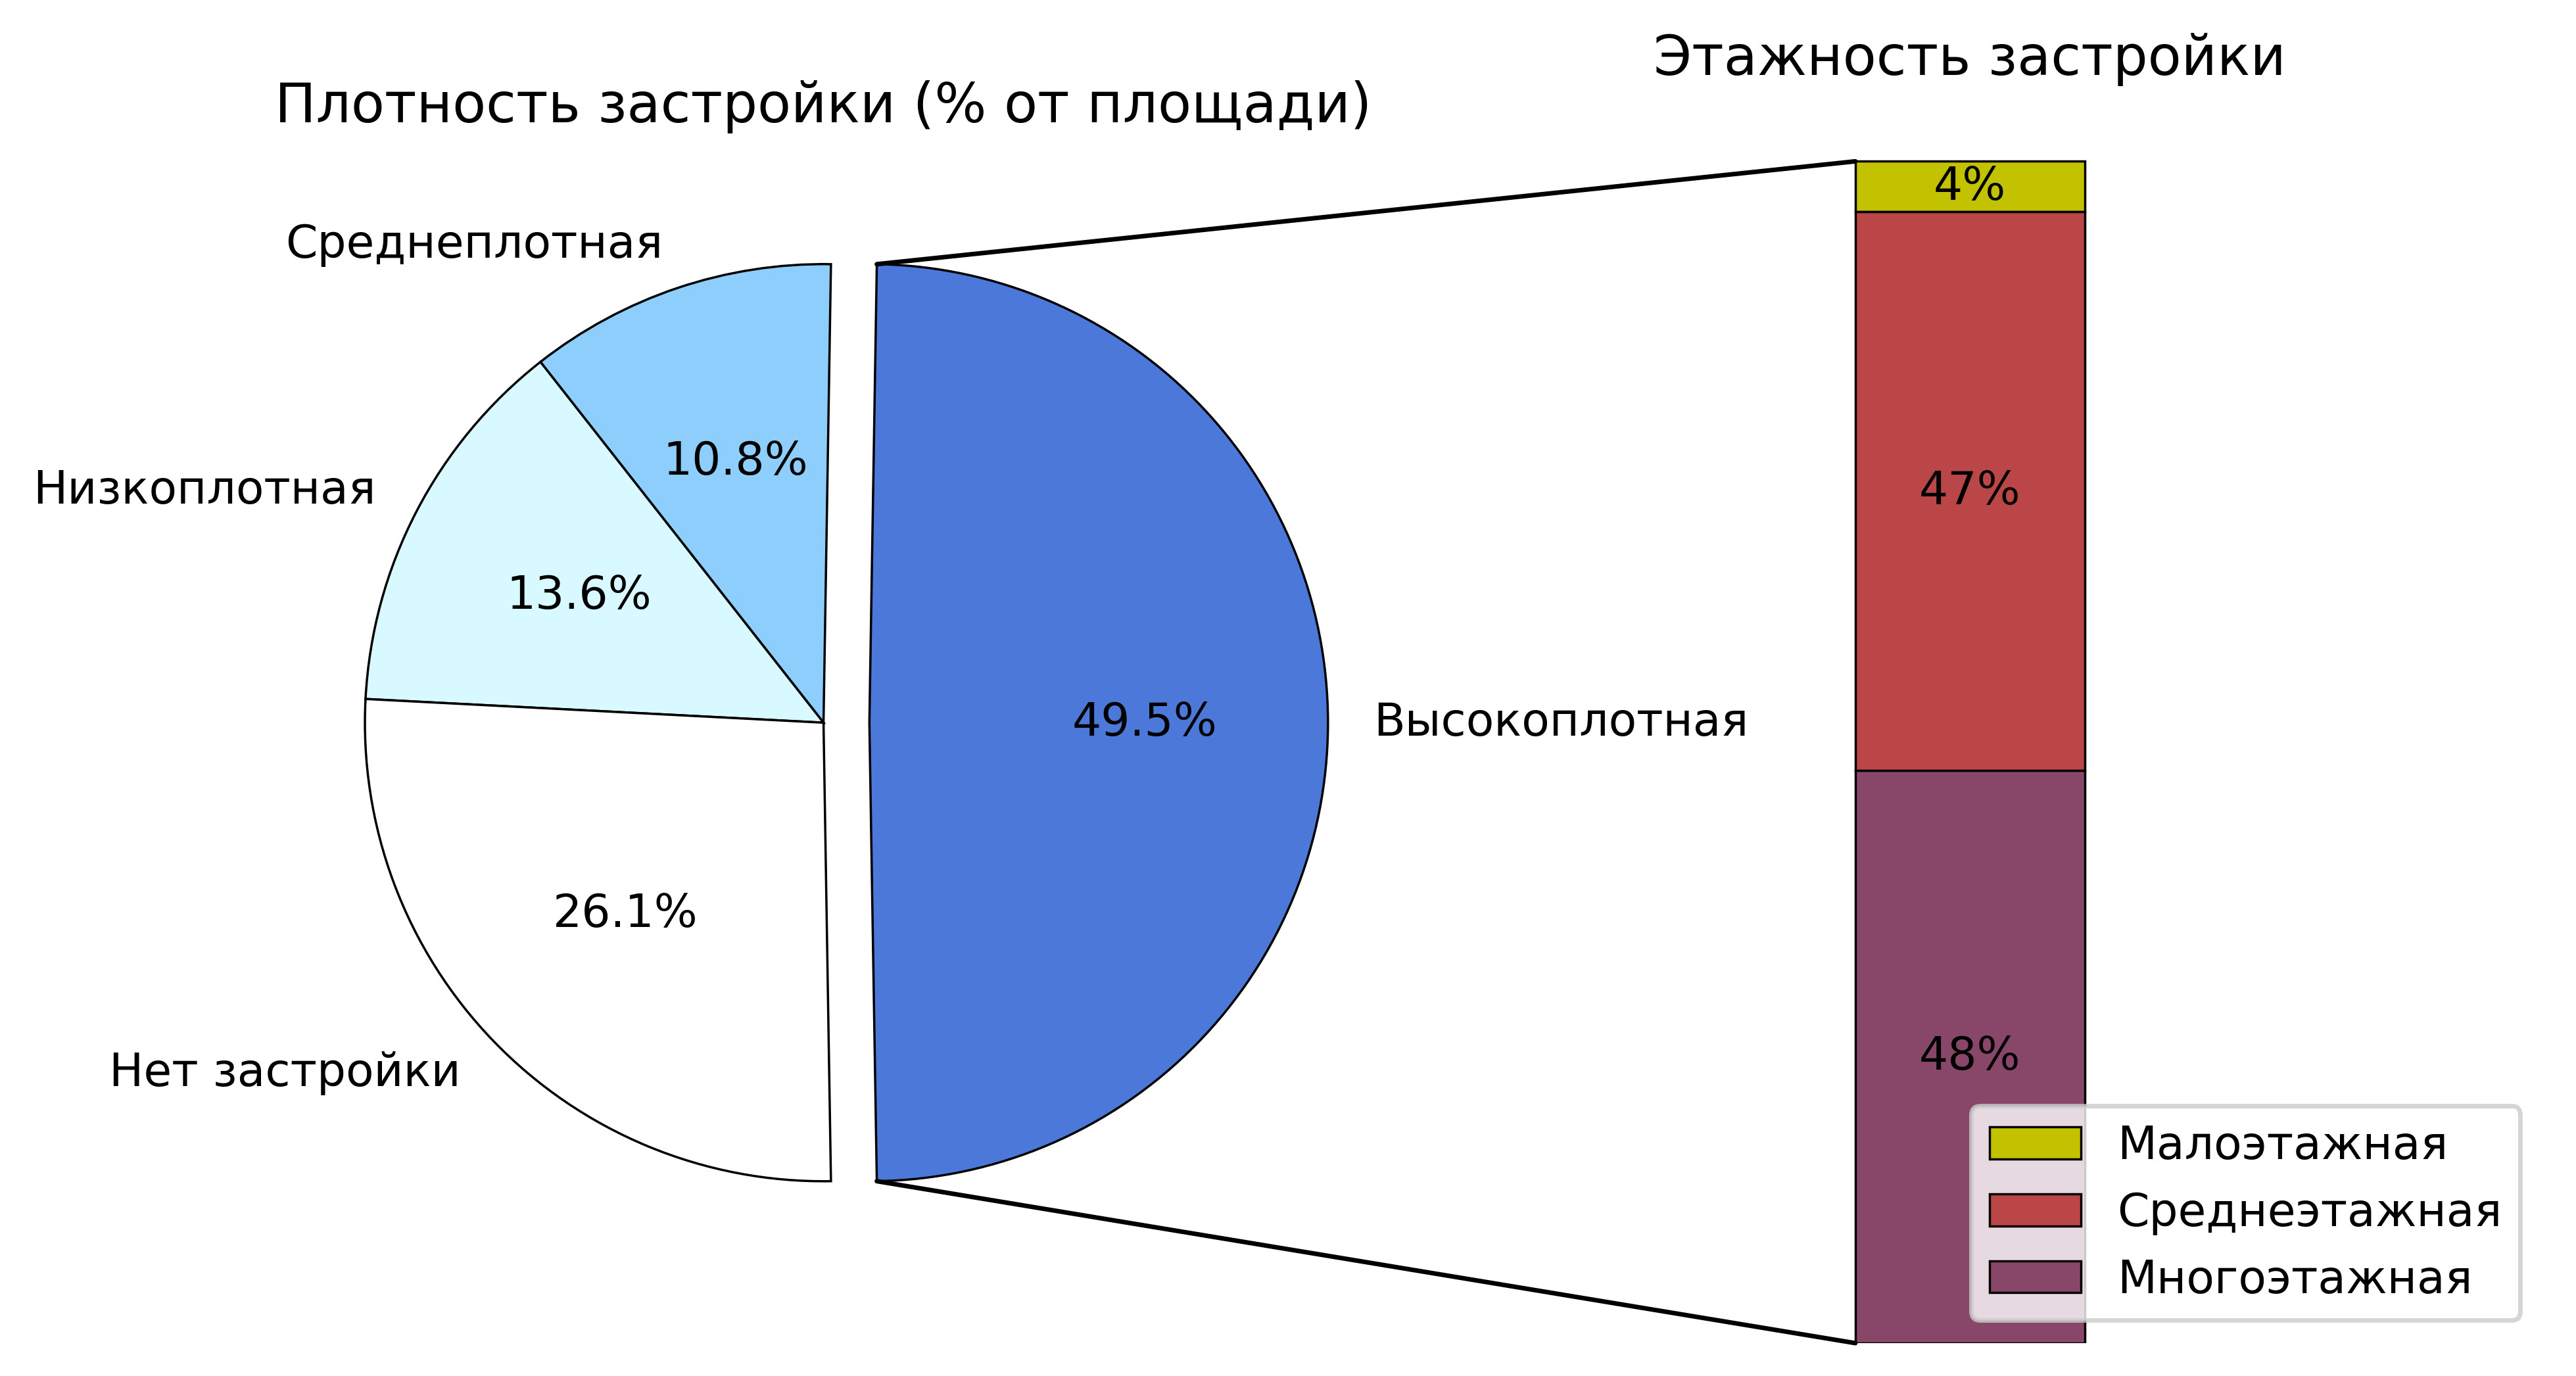

In [339]:
from matplotlib.patches import ConnectionPatch

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5), dpi=500)
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = k[3][0], k[2][0], k[1][0], k[0][0]
labels = ['Высокоплотная', 'Среднеплотная', 'Низкоплотная', 'Нет застройки']
explode = [0.1,0,0,0]
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['#4c78d9', '#8ecefc','#d8f9ff', '#ffffff'], wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
ax1.set_title('Плотность застройки (% от площади)')

# bar chart parameters
age_ratios = p[2][0], p[1][0], p[0][0]
age_labels = ['Многоэтажная', 'Среднеэтажная', 'Малоэтажная']
bottom = 1
width = .2

colors = ['#c2c200', '#ba4647','#884769']
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=colors[j], label=label, **{'linewidth': .5, 'edgecolor': 'black'})
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Этажность застройки')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\pie_buildings")

№  LN_type_1  S natural (%)  S artificial (%)  \
№                     1.000000   0.288020       0.103155          0.073920   
LN_type_1             0.288020   1.000000       0.551257          0.014592   
S natural (%)         0.103155   0.551257       1.000000         -0.330358   
S artificial (%)      0.073920   0.014592      -0.330358          1.000000   
S buildings (%)      -0.154896  -0.513109      -0.642849         -0.510553   
P buildings (sqm/ha) -0.222110  -0.534863       0.052108         -0.307220   
P_buildings_index    -0.240824  -0.637672      -0.128825         -0.503793   
floors_cnt           -0.279455  -0.298699       0.350969         -0.088206   
S commercial_FN (%)  -0.098472  -0.123096      -0.135875         -0.082948   
S resid_FN (%)       -0.176881  -0.127866       0.483337         -0.084090   
S industry_FN (%)    -0.081489  -0.330496      -0.551227         -0.337661   
S resid (sqm)        -0.061679  -0.020548       0.418293         -0.036312   
S non-resid (sqm)    -0.233563  -0.104563      -0.060162          0.032332   
S (sqm)              -0.094440   0.057835       0.409027         -0.023711   

                      S buildings (%)  P buildings (sqm/ha)  \
№                           -0.154896             -0.222110   
LN_type_1                   -0.513109             -0.534863   
S natural (%)               -0.642849              0.052108   
S artificial (%)            -0.510553             -0.307220   
S buildings (%)              1.000000              0.200547   
P buildings (sqm/ha)         0.200547              1.000000   
P_buildings_index            0.525908              0.821034   
floors_cnt                  -0.248974              0.820504   
S commercial_FN (%)          0.193097              0.056344   
S resid_FN (%)              -0.371620              0.536121   
S industry_FN (%)            0.775974              0.008969   
S resid (sqm)               -0.351135              0.427346   
S non-resid (sqm)            0.031255              0.190141   
S (sqm)                     -0.352275              0.125884   

                      P_buildings_index  floors_cnt  S commercial_FN (%)  \
№                             -0.240824   -0.279455            -0.098472   
LN_type_1                     -0.637672   -0.298699            -0.123096   
S natural (%)                 -0.128825    0.350969            -0.135875   
S artificial (%)              -0.503793   -0.088206            -0.082948   
S buildings (%)                0.525908   -0.248974             0.193097   
P buildings (sqm/ha)           0.821034    0.820504             0.056344   
P_buildings_index              1.000000    0.580525             0.026144   
floors_cnt                     0.580525    1.000000            -0.071966   
S commercial_FN (%)            0.026144   -0.071966             1.000000   
S resid_FN (%)                 0.446421    0.776897            -0.228659   
S industry_FN (%)              0.343861   -0.349914            -0.206510   
S resid (sqm)                  0.164574    0.535786            -0.065601   
S non-resid (sqm)              0.137006    0.131823             0.186119   
S (sqm)                        0.001108    0.248009            -0.057690   

                      S resid_FN (%)  S industry_FN (%)  S resid (sqm)  \
№                          -0.176881          -0.081489      -0.061679   
LN_type_1                  -0.127866          -0.330496      -0.020548   
S natural (%)               0.483337          -0.551227       0.418293   
S artificial (%)           -0.084090          -0.337661      -0.036312   
S buildings (%)            -0.371620           0.775974      -0.351135   
P buildings (sqm/ha)        0.536121           0.008969       0.427346   
P_buildings_index           0.446421           0.343861       0.164574   
floors_cnt                  0.776897          -0.349914       0.535786   
S commercial_FN (%)        -0.228659          -0.206510      -0.065601   
S resid_FN (%)              1.0

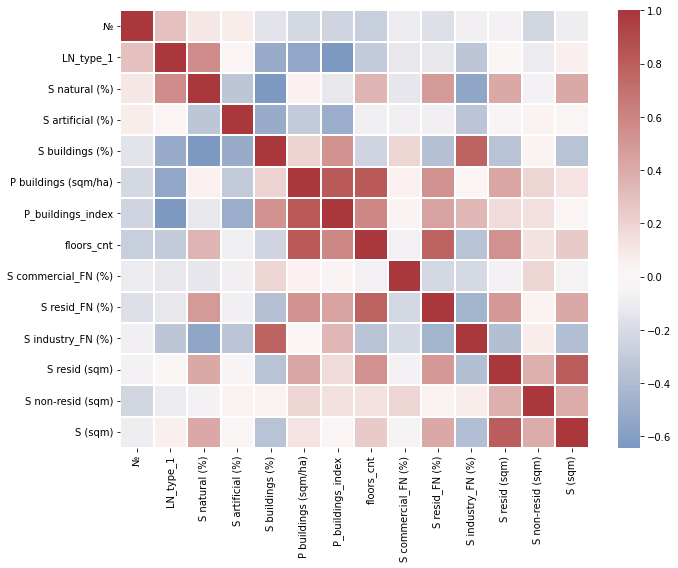

In [447]:
from sklearn.preprocessing import scale
import seaborn as sns

df1 = pd.DataFrame(scale(df[df.columns[:-5]]))
correlation_numbers = df1.corr()
correlation = correlation_numbers.rename(columns_names, axis='index').rename(columns_names, axis='columns')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlation, cmap='vlag',center=0,linewidths=.2)
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\correlation")
correlation

In [442]:
from sklearn.linear_model import LinearRegression
import numpy as np

# сбор корреляций > 0.5

c = 0
listik = []
for i in range(14):
    for k in range(1+i, 14):
        if abs(correlation_numbers[i].T[k]) > 0.5:
            listik.append([i,k,c])
            c += 1
            
# построение графиков

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15), dpi=500)
for i, k, idx in listik:
    ax = axes[idx // 4, idx % 4]
    linspace = np.linspace(min(df[df.columns[i]]) - 0.1*max(df[df.columns[i]]), 1.1*max(df[df.columns[i]]), 50)[:, np.newaxis]
    X = df[[df.columns[i]]]
    y = df[df.columns[k]]
    X_test = linspace

    model_1 = LinearRegression()
    model_1.fit(X, y)
    y_tr = model_1.predict(X)
    y_test = model_1.predict(X_test)

    ax.set_xlim(min(df[df.columns[i]]) - 0.1*max(df[df.columns[i]]), 1.1*max(df[df.columns[i]]))
    ax.set_ylim(min(df[df.columns[k]]) - 0.1*max(df[df.columns[k]]), 1.1*max(df[df.columns[k]]))
    ax.set_title(label="corr = " + str(round(correlation_numbers[i].T[k], 2)))
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel(df.columns[k])
    ax.scatter(df[df.columns[i]], df[df.columns[k]])
    ax.plot(linspace.ravel(), y_test, c='pink')
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\corr_regression")

c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearReg

In [71]:
indexes = pd.read_csv(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\204_5_Сводная индекс - Индексы.csv", encoding='utf-8')
indexes = indexes.fillna(0)
indexes['Площадь'] = indexes['Площадь'] / 10000
indexes.head()

№ ЗУ  Ландшафтное (вид)  Ландшафтное (тип)  Строительное (вид)  \
0     1               1023                102              301026   
1     2               2011                201                   0   
2     3               1011                101              101005   
3     4               1023                102              302028   
4     5               1011                101              100014   

   Высота (вид)  Плотность (вид)  Функциональное (вид)   Площадь  
0           301                3                  2002  0.758239  
1             0                0                  3004  0.150830  
2           101                1                  1004  0.193465  
3           302                3                  2002  0.672986  
4           100                3                  3004  0.028001

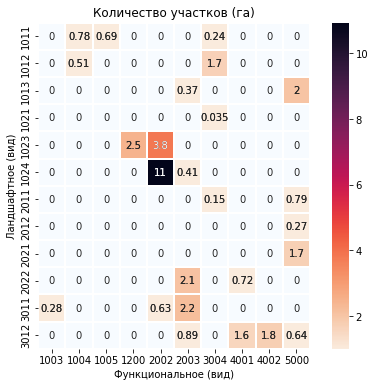

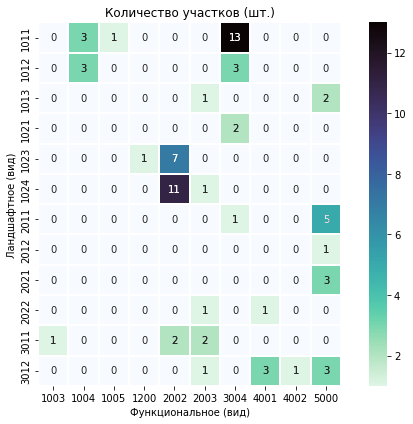

In [77]:
pivot = pd.pivot_table(indexes, index=indexes[indexes.columns[1]], columns=indexes[indexes.columns[6]], values='Площадь', aggfunc=sum)
fig, ax = plt.subplots(figsize=(8, 6))
pivot_clean = pivot.fillna(0)
ax = sns.heatmap(pivot_clean, cmap='Blues', linewidths=.2, vmin=0, annot=True, square=True, cbar=False)
ax = sns.heatmap(pivot, cmap='rocket_r', linewidths=.2, vmin=1, annot=True, square=True)
ax.set_title("Количество участков (га)")

pivot_1 = pd.pivot_table(indexes, index=indexes[indexes.columns[1]], columns=indexes[indexes.columns[6]], values='Площадь', aggfunc=len)
fig, ax = plt.subplots(figsize=(8, 6))
pivot_clean_1 = pivot_1.fillna(0)
ax = sns.heatmap(pivot_clean_1, cmap='Blues', linewidths=.2, vmin=0, annot=True, square=True, cbar=False)
ax = sns.heatmap(pivot_1, cmap='mako_r', linewidths=.2, vmin=1, annot=True, square=True)
ax.set_title("Количество участков (шт.)")
plt.tight_layout()

plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\heatmap_1")

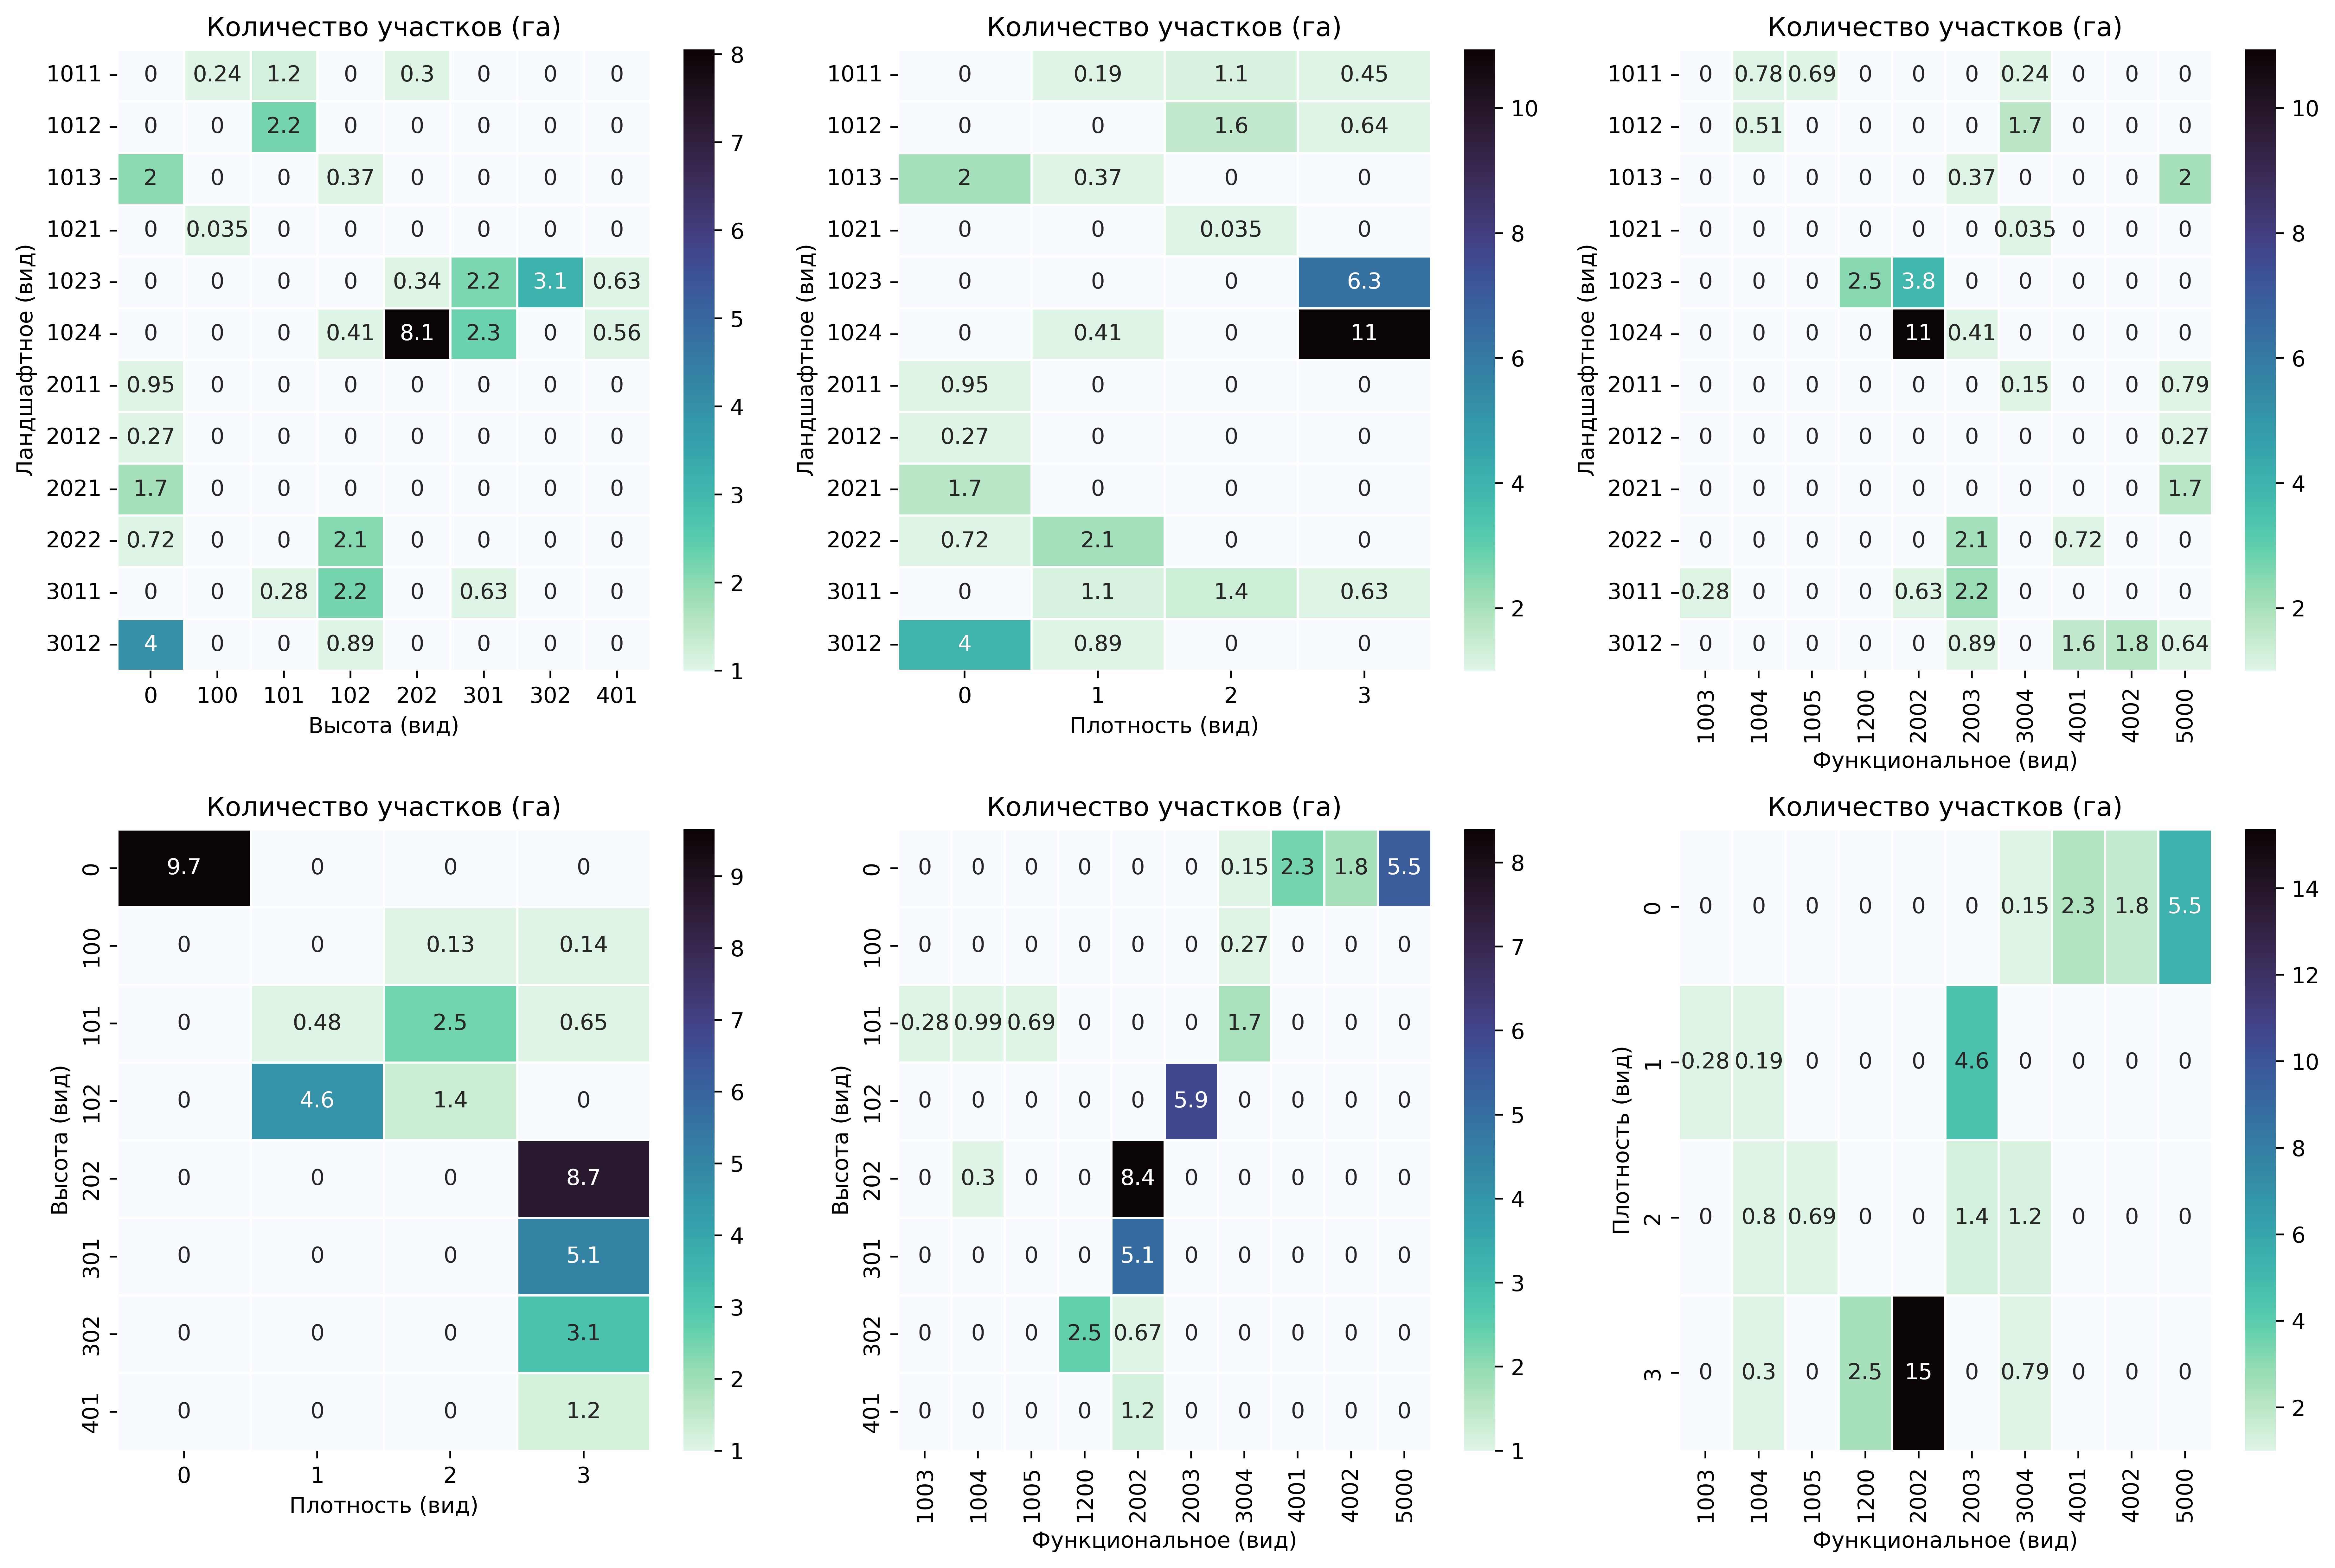

In [92]:
c = 0
indexes_only = indexes.drop(indexes.columns[[0,2,3]], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=500)
for i in range(4):
    for k in range(i + 1, 4):
        ax = axes[c // 3, c % 3]
        pivot = pd.pivot_table(indexes_only, index=indexes_only[indexes_only.columns[i]], columns=indexes_only[indexes_only.columns[k]], values='Площадь', aggfunc=sum)
        pivot_clean = pivot.fillna(0)
        sns.heatmap(pivot_clean, cmap='Blues', linewidths=1, vmin=0, annot=True, cbar=False, ax=ax)
        sns.heatmap(pivot, cmap='mako_r', linewidths=1, vmin=1, annot=True, ax=ax) 
        c += 1
        ax.set_title("Количество участков (га)")
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\heatmaps_1")

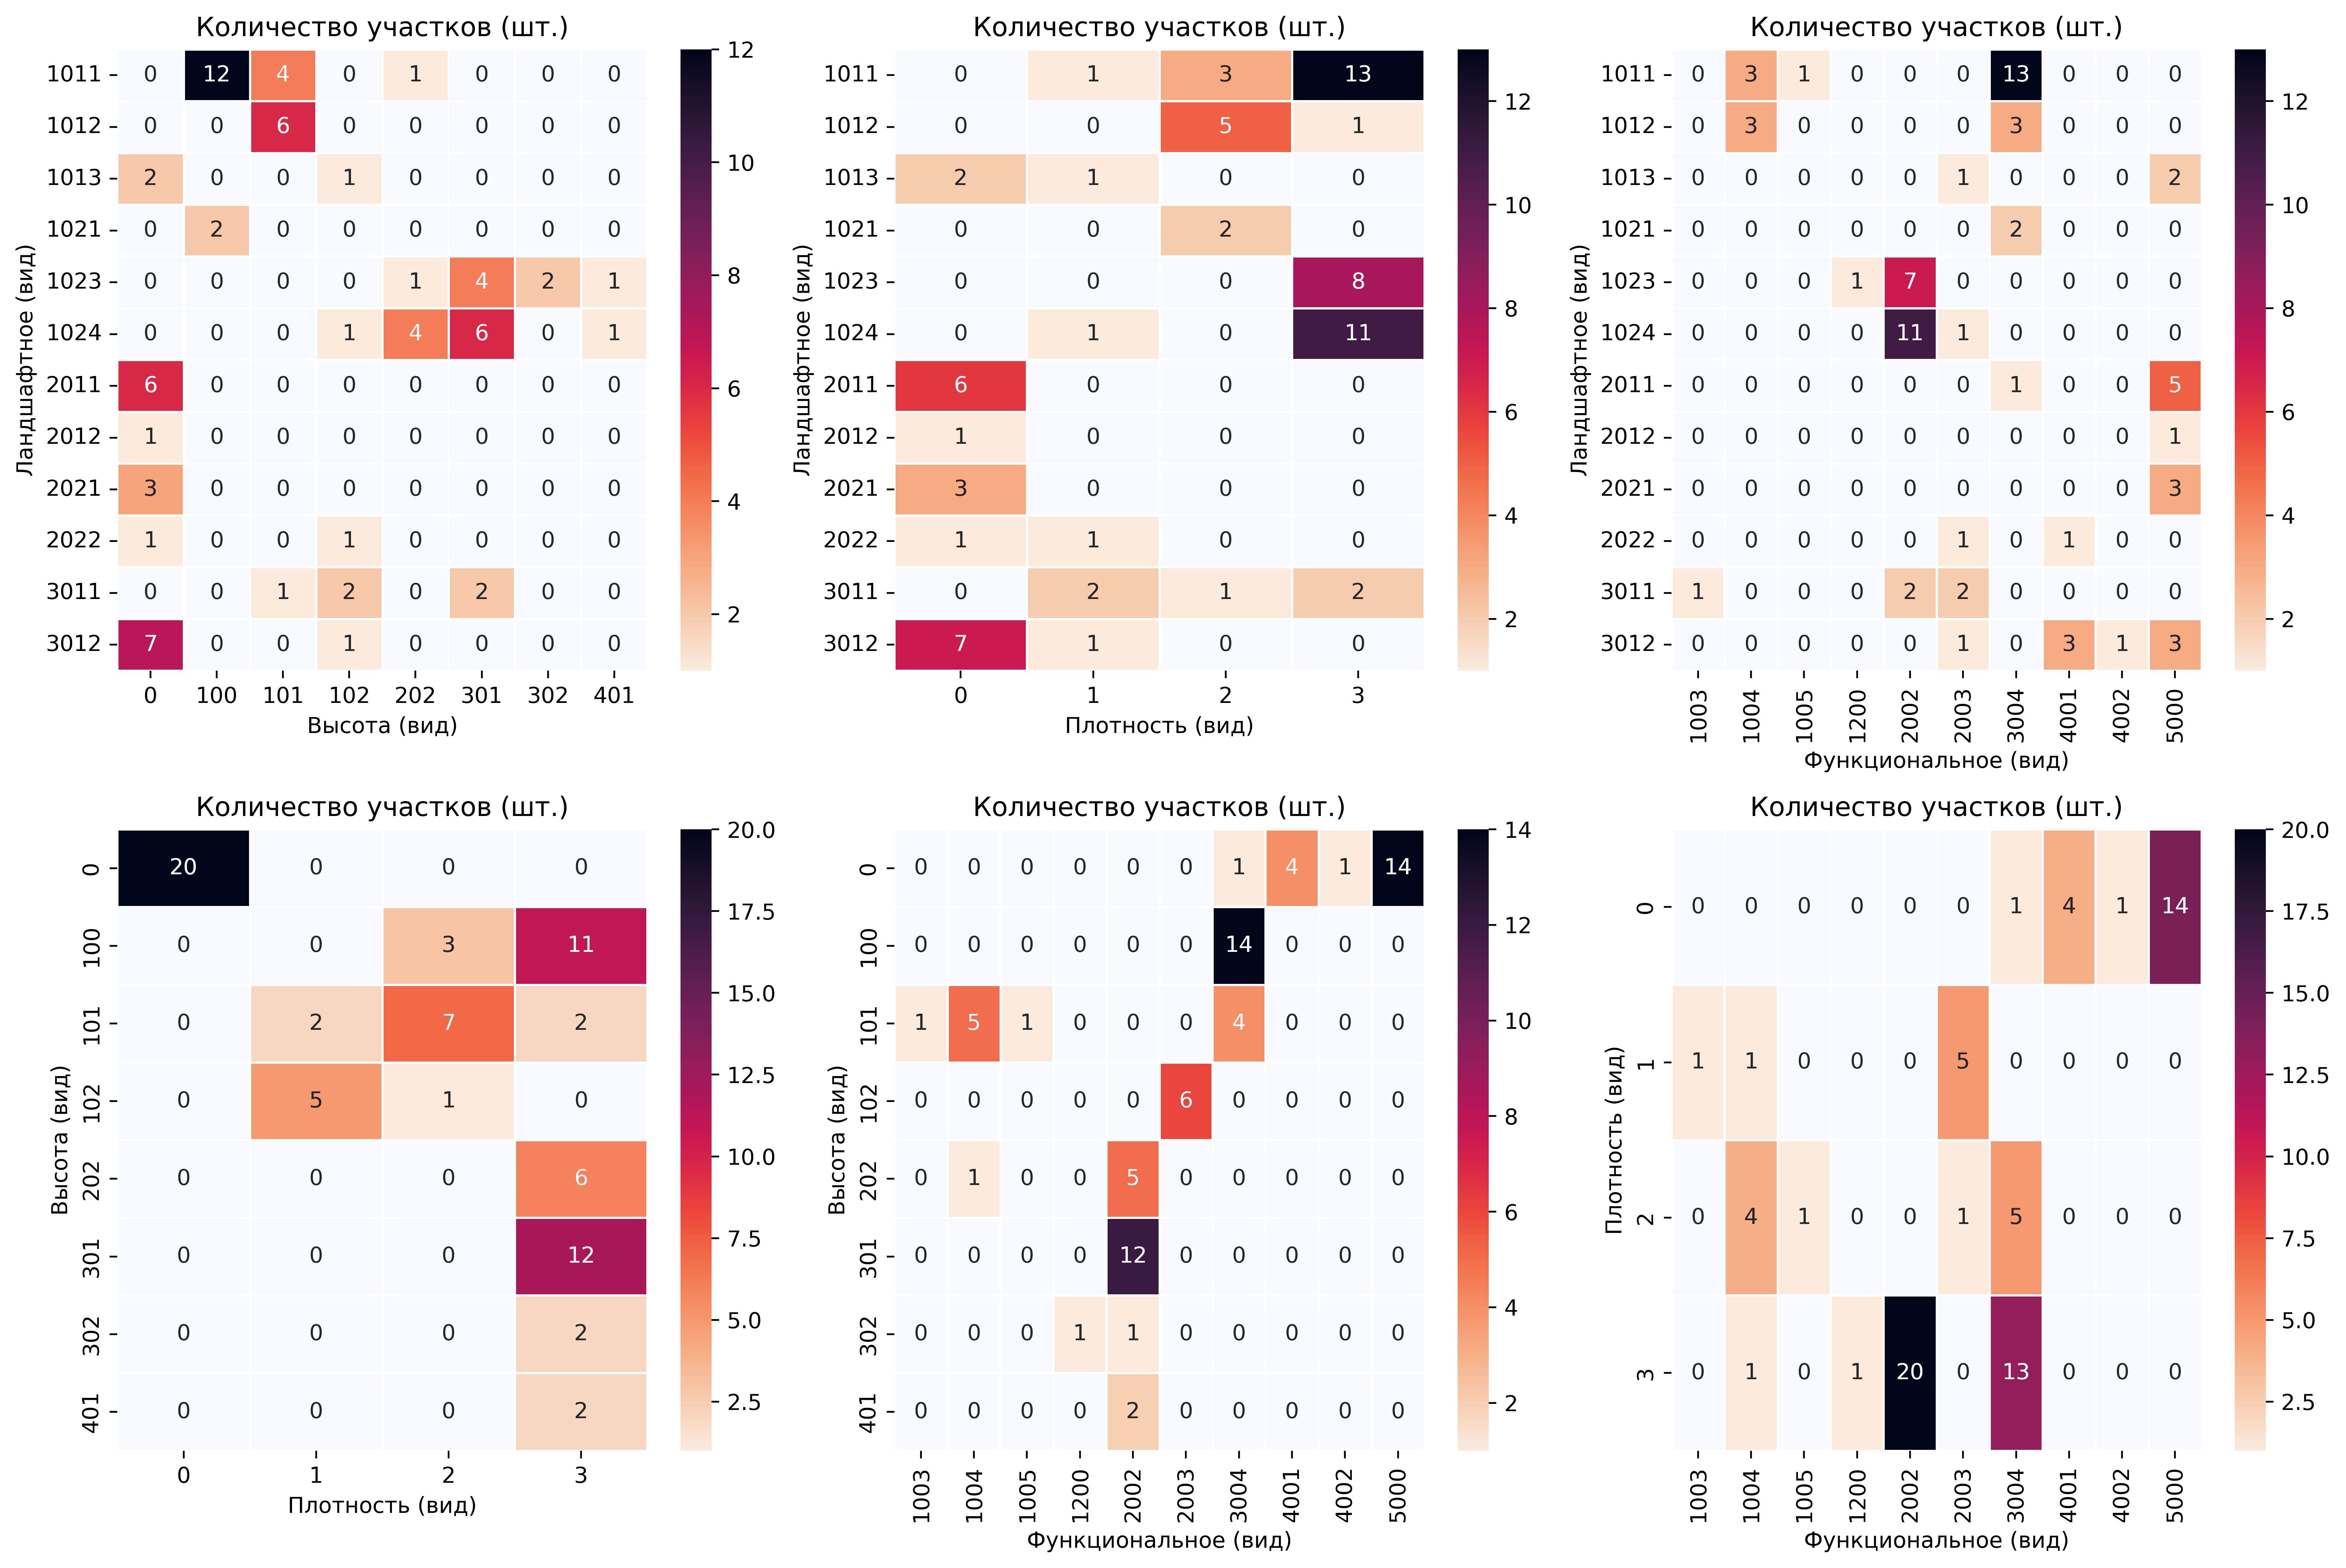

In [78]:
c = 0
indexes_only = indexes.drop(indexes.columns[[0,2,3,7]], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=500)
for i in range(4):
    for k in range(i + 1,4):
        ax = axes[c // 3, c % 3]
        pivot = pd.pivot_table(indexes_only, index=indexes_only[indexes_only.columns[i]], columns=indexes_only[indexes_only.columns[k]], values='Ландшафтное (вид)', aggfunc=len)
        pivot_clean = pivot.fillna(0)
        sns.heatmap(pivot_clean, cmap='Blues', linewidths=1, vmin=0, annot=True, cbar=False, ax=ax)
        sns.heatmap(pivot, cmap='rocket_r', linewidths=1, vmin=1, annot=True, ax=ax) 
        c += 1
        ax.set_title("Количество участков (шт.)")
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\heatmaps_1")

In [194]:
c = 0
indexes_only = indexes.drop(indexes.columns[[0,2,3]], axis=1)

labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
width = 0.3


fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 25), dpi=500)
for i in range(4):
    for k in range(i + 1, 4):
        # upper right corner - ha
        ax = axes[c // 3 + c // 5, c + 1 - 2 * (c // 3) - c // 5]
        pivot = pd.pivot_table(indexes_only, index=indexes_only[indexes_only.columns[i]], columns=indexes_only[indexes_only.columns[k]], values='Площадь', aggfunc=sum)
        pivot_clean = pivot.fillna(0)
        sns.heatmap(pivot_clean, cmap='Blues', linewidths=1, vmin=0, annot=True, cbar=False, ax=ax)
        sns.heatmap(pivot, cmap='mako_r', linewidths=1, vmin=1, annot=True, ax=ax, cbar=False)
        ax.set_title("Площадь участков (га)")
        
        # lower left corner - number
        ax = axes[c + 1 - 2 * (c // 3) - c // 5, c // 3 + c // 5]
        pivot = pd.pivot_table(indexes_only, index=indexes_only[indexes_only.columns[k]], columns=indexes_only[indexes_only.columns[i]], values='Ландшафтное (вид)', aggfunc=len)
        pivot_clean = pivot.fillna(0)
        sns.heatmap(pivot_clean, cmap='Blues', linewidths=1, vmin=0, annot=True, cbar=False, ax=ax)
        sns.heatmap(pivot, cmap='rocket_r', linewidths=1, vmin=1, annot=True, ax=ax, cbar=False) 
        ax.set_title("Количество участков (шт.)")
        c += 1
        
    # diag
    ax = axes[i,i]
    a = np.array(indexes_only.groupby(indexes_only.columns[i]).sum()['Площадь'])
    b = np.array(indexes_only.groupby(indexes_only.columns[i]).size())

    labels = sorted(list(set(indexes_only[indexes_only.columns[i]])))
    x = np.arange(len(labels))
    men_means = a
    women_means = b
    width = 0.35

    ax2 = ax.twinx()
    ax2.bar(x - width/2, men_means, width, label='Площадь (га)', color='pink')
    ax.bar(x + width/2, women_means, width, label='Кол-во (шт.)', color='lightgreen')
    ax.set_xticks(x, labels)
    ax.set_title(indexes_only.columns[i])
    ax2.legend(loc=2)
    ax.legend(loc=1)
    
plt.tight_layout()
plt.savefig(r"C:\Users\egorb\Documents\ГП\2 курс\ПроектСем\4 module\plots\heatmaps_2")

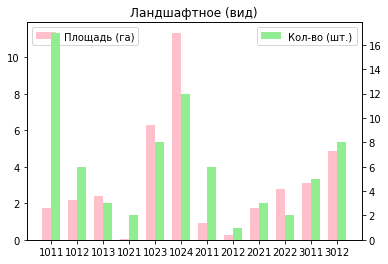

In [190]:
a = np.array(indexes_only.groupby(indexes_only.columns[i]).sum()['Площадь'])
b = np.array(indexes_only.groupby(indexes_only.columns[i]).size())

labels = sorted(list(set(indexes_only[indexes_only.columns[i]])))
x = np.arange(len(labels))
men_means = a
women_means = b
width = 0.35

i = 0
#ax = axes[i,i]
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(x - width/2, men_means, width, label='Площадь (га)', color='pink')
ax2.bar(x + width/2, women_means, width, label='Кол-во (шт.)', color='lightgreen')
ax.set_xticks(x, labels)
ax.set_title(indexes_only.columns[i])
ax.legend(loc=2)
ax2.legend(loc=1)
plt.show()

In [161]:
sorted(list(set(indexes_only[indexes_only.columns[i]])))
a = np.array(indexes_only.groupby(indexes_only.columns[i]).sum()['Площадь'])
b = np.array(indexes_only.groupby(indexes_only.columns[i]).size())
b

array([17,  6,  3,  2,  8, 12,  6,  1,  3,  2,  5,  8], dtype=int64)

In [38]:
from sklearn.linear_model import RidgeClassifierCV

y = df[[df.columns[1]]]
X = df1[df1.columns[2:]]

alphas = np.arange(1, 100, 5)
model_ridgecv = RidgeClassifierCV(cv=3, alphas=alphas)
model_ridgecv.fit(X, y)
y_tr = model_ridgecv.predict(X)
print(model_ridgecv.coef_)
model_ridgecv.score(X,y)

c:\users\egorb\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 0.04849134 -0.10207309  0.04312945 -0.05541191  0.10217121 -0.00241283
  -0.06725181 -0.06713982 -0.06094468 -0.11311082  0.03207993  0.06033267
  -0.76683003  0.04064791  0.0406339  -0.1569118 ]
 [-0.18415247  0.29159963 -0.08205994  0.06391495 -0.09735424 -0.07048498
   0.19369202  0.2067661   0.17499097  0.18163735 -0.07244525 -0.04954401
   0.13367043 -0.00219298 -0.00216291  0.34783052]
 [ 0.13566113 -0.18952653  0.03893049 -0.00850304 -0.00481697  0.07289781
  -0.12644021 -0.13962627 -0.11404629 -0.06852653  0.04036531 -0.01078865
   0.6331596  -0.03845493 -0.03847099 -0.19091872]]


0.958904109589041

In [39]:
from sklearn.model_selection import train_test_split

X = df[df.columns[5::]] 
y = df[df.columns[1]]
X_tr, X_te, y_tr, y_te = train_test_split(X, y)
X_tr.shape, X_te.shape

((54, 13), (19, 13))

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_tr)
X_tr_transformed = scaler.transform(X_tr)
X_te_transformed = scaler.transform(X_te)

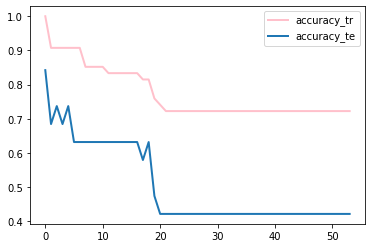

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_tr = []
accuracy_te = []
for i in range(1, len(X_tr)+1):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_tr_transformed, y_tr)
    preds_tr = model_knn.predict(X_tr_transformed)
    preds_te = model_knn.predict(X_te_transformed)
    accuracy_tr.append(accuracy_score(y_tr, preds_tr))
    accuracy_te.append(accuracy_score(y_te, preds_te))

fig, ax = plt.subplots()
ax.plot(np.arange(0,len(X_tr),1), accuracy_tr, linewidth=2.0, label='accuracy_tr', color='pink')
ax.plot(np.arange(0,len(X_tr),1), accuracy_te, linewidth=2.0, label='accuracy_te')
plt.legend()
plt.show()

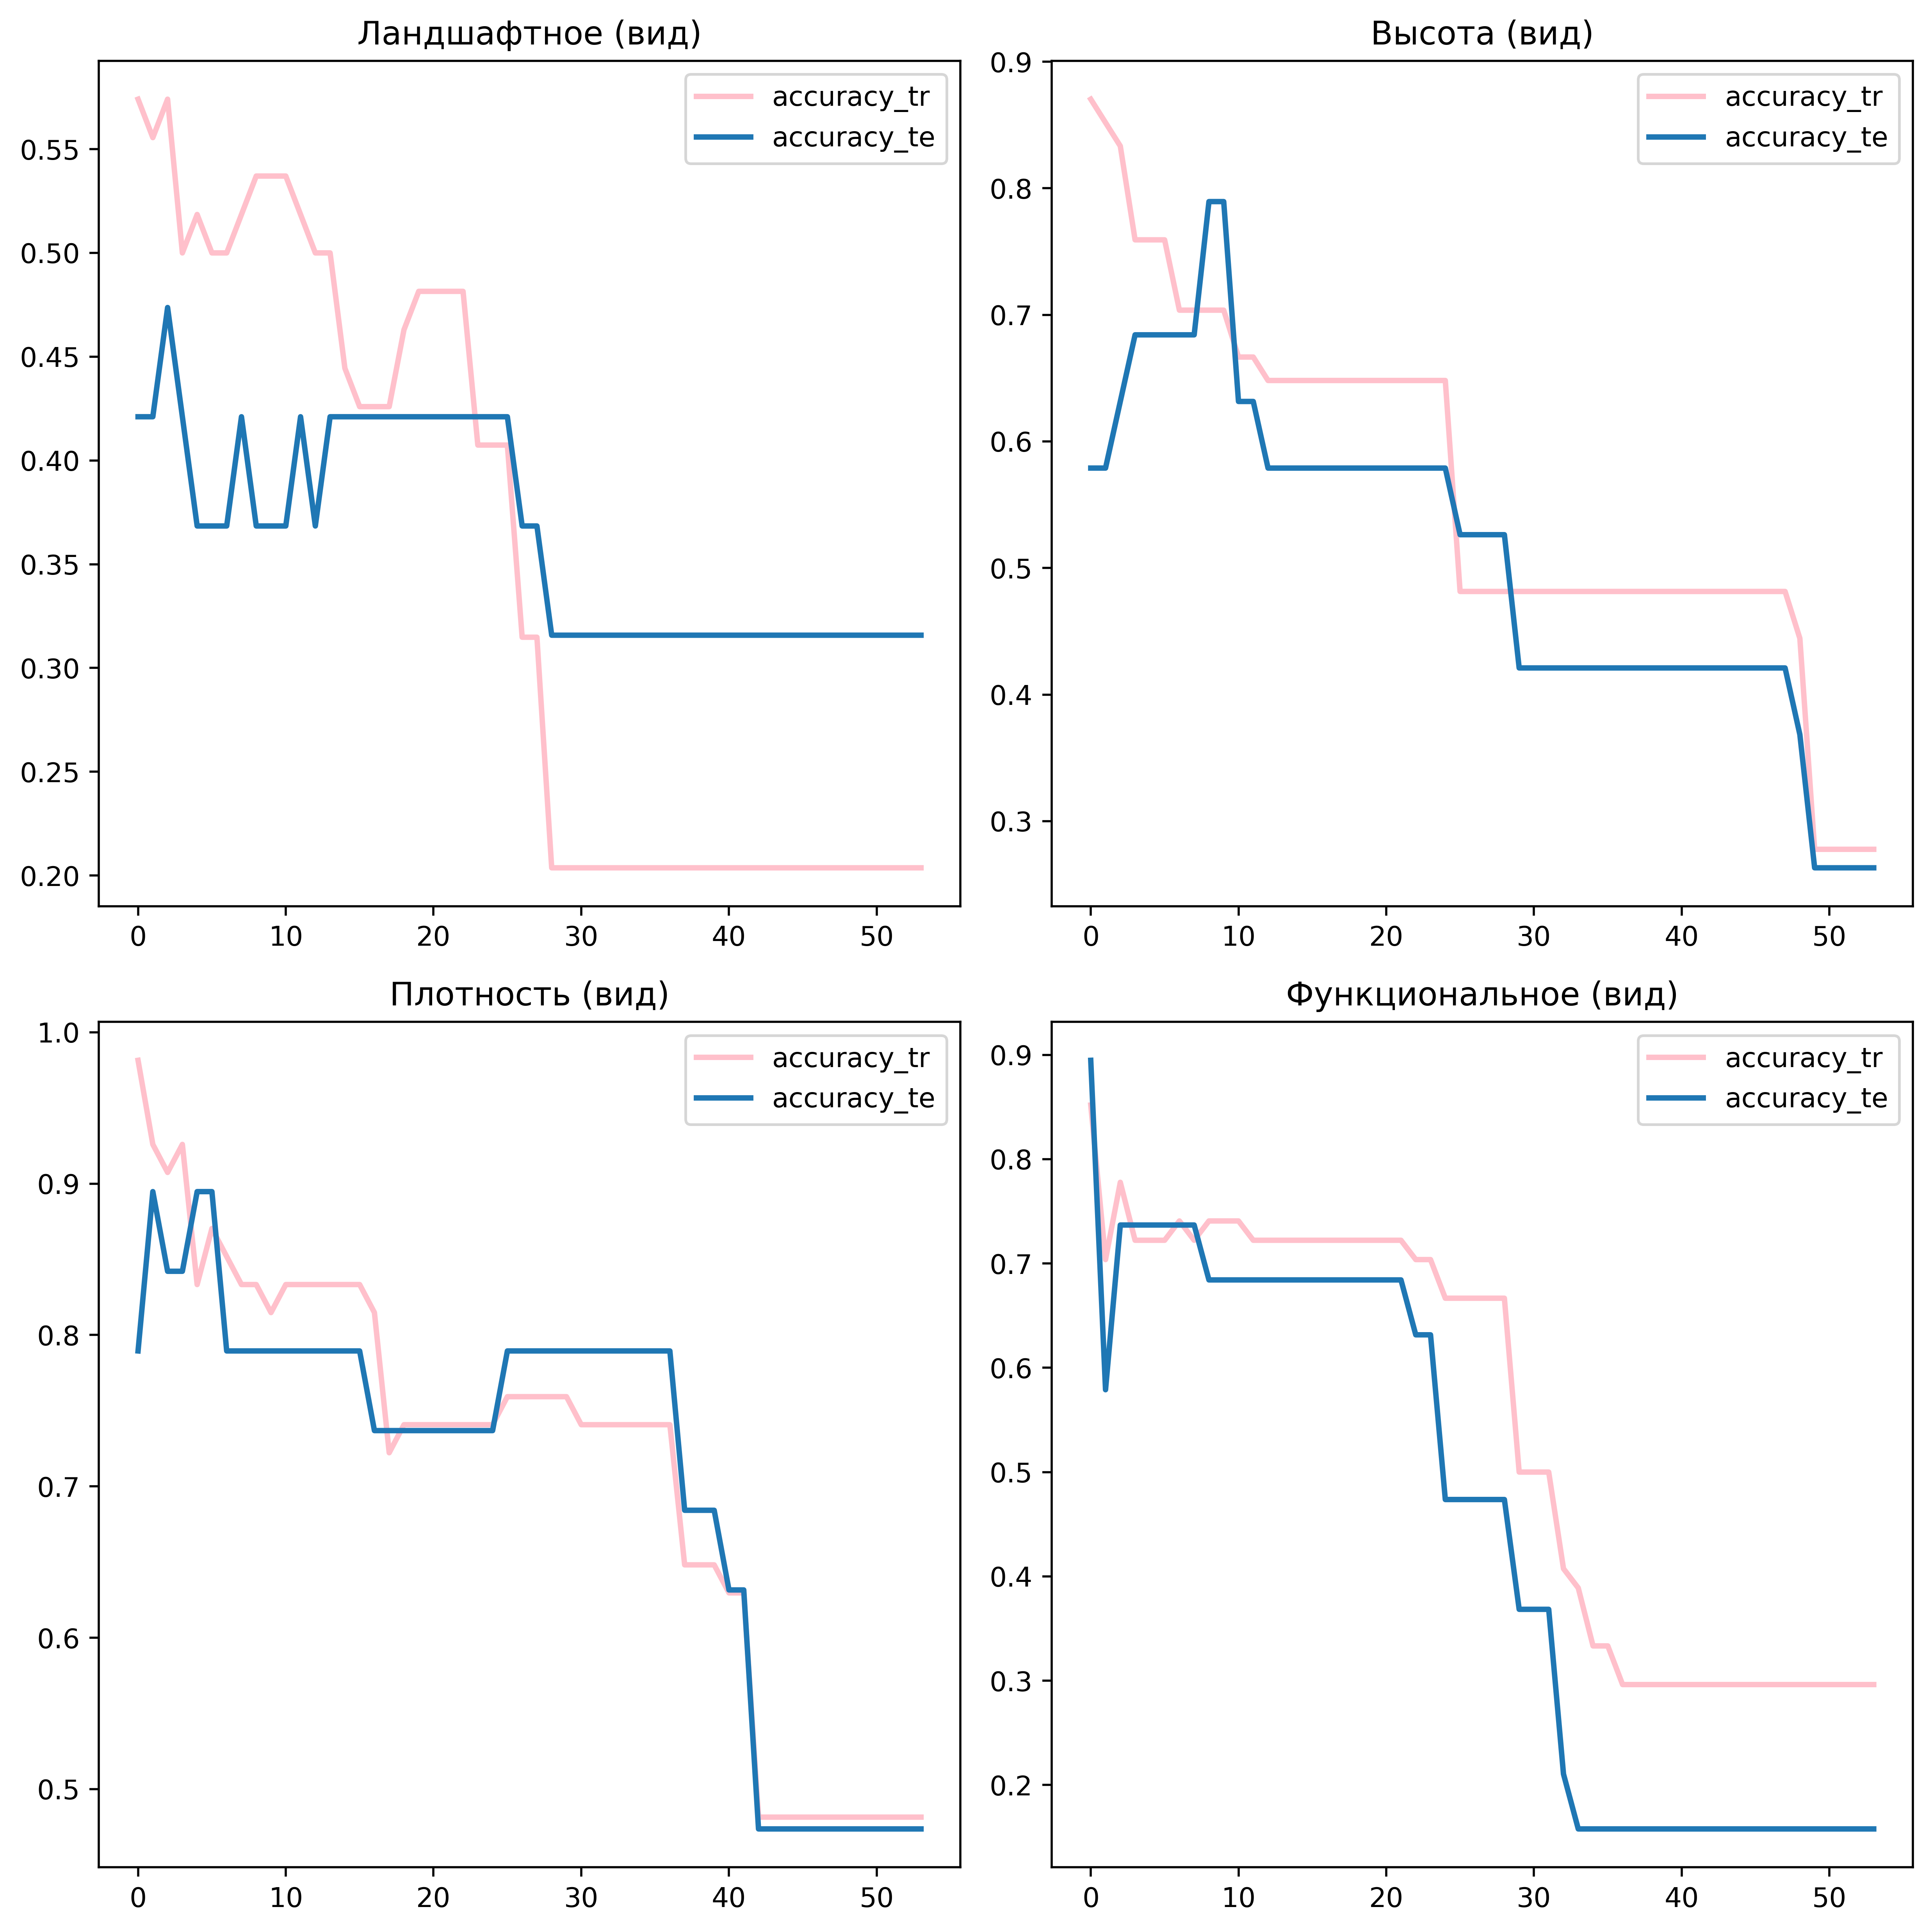

In [42]:
from sklearn.model_selection import cross_val_score

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=500)
for i in range(4):
    listik_1 = [0,1,2,3]
    listik_1.pop(i)
    X = indexes_only[indexes_only.columns[listik_1]] 
    y = indexes_only[indexes_only.columns[i]]
    X_tr, X_te, y_tr, y_te = train_test_split(X, y)
    
    scaler = StandardScaler().fit(X_tr)
    X_tr_transformed = scaler.transform(X_tr)
    X_te_transformed = scaler.transform(X_te)

    accuracy_tr = []
    accuracy_te = []
    for k in range(1, len(X_tr)+1):
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_tr_transformed, y_tr)
        preds_tr = model_knn.predict(X_tr_transformed)
        preds_te = model_knn.predict(X_te_transformed)
        accuracy_tr.append(accuracy_score(y_tr, preds_tr))
        accuracy_te.append(accuracy_score(y_te, preds_te))
    
    ax = axes[i // 2, i % 2]
    ax.plot(np.arange(0,len(X_tr),1), accuracy_tr, linewidth=2.0, label='accuracy_tr', color='pink')
    ax.plot(np.arange(0,len(X_tr),1), accuracy_te, linewidth=2.0, label='accuracy_te')
    ax.legend()
    ax.set_title(indexes_only.columns[i])
plt.tight_layout()